In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
gp_table = pd.read_table('./crab_gp_kaz_10_2016-2018_calib_7types.csv', sep='\t')

In [3]:
dataset_pulse = pd.DataFrame(columns=[
    f'point_{i}' for i in range(100)
])
dataset_pulse['type'] = None

In [4]:
for idx, _ in enumerate(gp_table['Date']):
    file = './results_by_08.05.2019/' + gp_table['fName'][idx][2:]
    profile = np.genfromtxt(file, skip_header=6)
    
    if len(profile) == 100:
        pass
    else:
        profile = np.append(profile, np.zeros(100 - len(profile)))
    
    profile = profile/max(profile)
    
    dataset_pulse.loc[idx] = [
        *profile,
        int(gp_table['Type'][idx])
    ]

In [5]:
# reset type to 2 fraction 0 - noise and 1 - pulse
for idx, _ in enumerate(dataset_pulse['point_0']):
    if dataset_pulse['type'][idx] < 4:
        dataset_pulse['type'][idx] = 0
    else:
        dataset_pulse['type'][idx] = 1

In [6]:
X = dataset_pulse.drop(['type'], axis=1)
y = dataset_pulse['type']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
loaded_model = joblib.load('dina_model_RFC_pulse_noise_95.sav')
predictions = loaded_model.predict(X_test)
print(accuracy_score(predictions, y_test))

0.9834815756035579


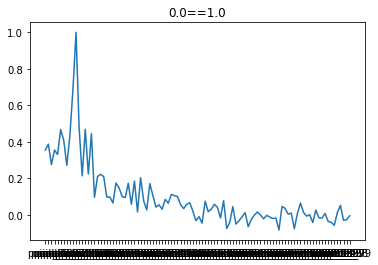

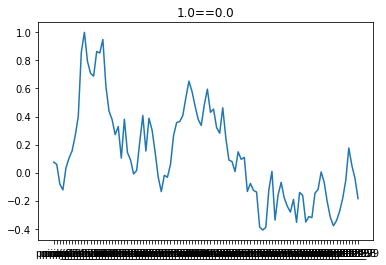

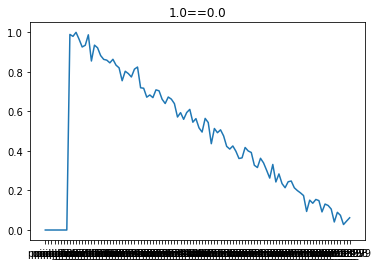

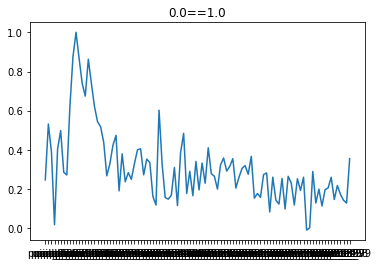

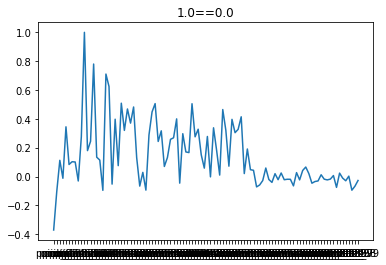

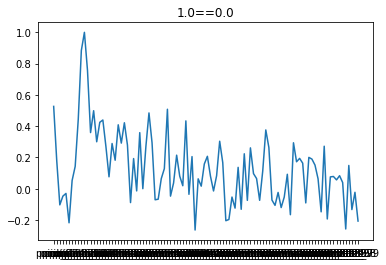

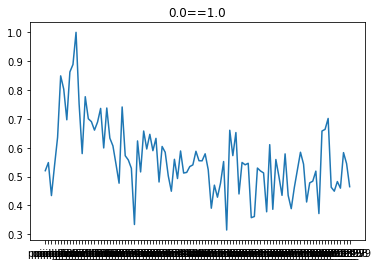

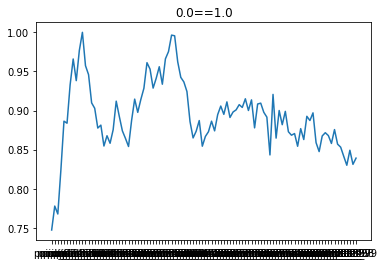

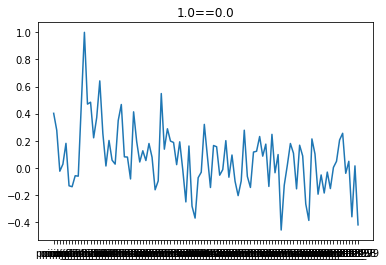

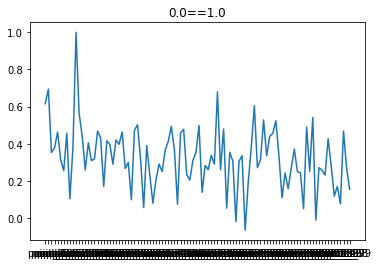

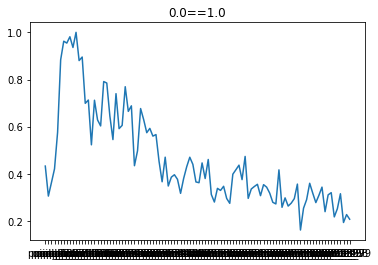

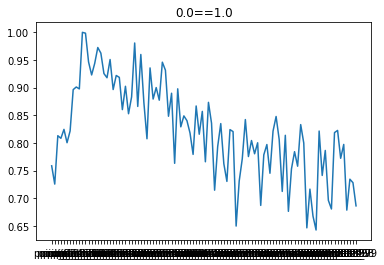

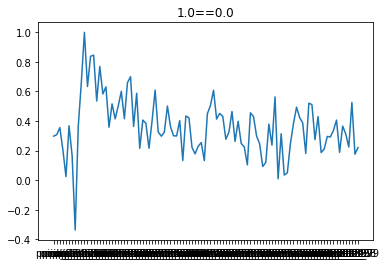

In [77]:
for idx, elem in enumerate(predictions):
    if predictions[idx] != y_test.iloc[idx]:
        plt.close()
        plt.plot(X_test.iloc[idx])
        plt.title(f'{predictions[idx]}=={y_test.iloc[idx]}')
        plt.show()
    else:
        continue

In [63]:
X_test.iloc[0]

point_0    -0.034200
point_1    -0.014656
point_2    -0.116847
point_3     0.015386
point_4    -0.089912
              ...   
point_95    0.000000
point_96    0.000000
point_97    0.000000
point_98    0.000000
point_99    0.000000
Name: 1178, Length: 100, dtype: float64

In [65]:
loaded_model.predict(X_test.T.iloc[0])

ValueError: Expected 2D array, got 1D array instead:
array=[-3.41996402e-02 -8.48654751e-03  7.34101295e-01  5.74513853e-01
  0.00000000e+00  9.06697154e-01  1.15945987e-01  1.37205958e-01
  1.61629021e-01  2.37210080e-01 -1.56035915e-01 -1.19016794e-02
  7.98546851e-01  3.67671371e-01  0.00000000e+00 -3.81913446e-02
  3.56213778e-01  9.05446231e-01  4.67027687e-02  4.36358303e-02
  4.14373353e-02  7.97902048e-02  5.67772891e-03  7.76485026e-01
  4.47593033e-01  7.62907207e-01 -7.51023926e-03  5.57895042e-02
 -1.45267053e-02  3.55833508e-02 -1.15152905e-02  3.33716231e-03
  5.97156845e-02  3.73022631e-02  8.22151184e-01  8.43522727e-01
  7.72474587e-01  8.36535692e-01  4.19323742e-01  3.41973513e-01
 -6.19970076e-02 -6.15151003e-02  8.97000730e-01 -4.19289827e-01
  2.71057069e-01  5.67708373e-01  7.31593296e-02 -2.19244827e-02
  3.13242614e-01  8.40351939e-01  8.29106748e-01 -3.51189151e-02
  6.21649981e-01 -1.96195059e-02  9.20313776e-01 -8.66573211e-03
  1.97953824e-02  6.42785251e-01  2.99480051e-01  8.30083311e-01
  3.07787657e-01  8.55978727e-01  4.66443211e-01  2.99171591e-03
 -8.26900080e-02 -9.43394378e-02 -1.45574972e-01  7.31778219e-02
 -5.51151812e-01  0.00000000e+00 -5.72703332e-02 -1.09039270e-03
  7.65223503e-01 -4.32541780e-02  6.79281056e-01  8.29973221e-02
  8.33060026e-01  1.99238453e-02  3.77536774e-01  0.00000000e+00
 -7.72052482e-02  8.56876299e-02  9.08276141e-01 -1.56508580e-01
 -1.57414958e-01 -8.94234180e-02  8.59790981e-01  8.80484819e-01
  4.83271368e-02 -9.25714746e-02  8.90026271e-01 -8.55593830e-02
  0.00000000e+00 -4.62878570e-02  7.14350939e-01  1.73442006e-01
  3.57825235e-02  5.76553881e-01 -2.06098154e-01  8.77193213e-01
 -9.62482393e-02  9.53869939e-01  9.60457265e-01  0.00000000e+00
  1.24092422e-01  8.32439184e-01  3.41737755e-02 -4.55711335e-02
 -3.49813774e-02 -2.32778303e-02 -3.20129171e-02 -2.07349837e-01
 -1.92791633e-02 -1.16931260e-01 -2.00641111e-01  2.42564663e-01
 -1.52611099e-02  9.12595689e-01  1.92897506e-02  2.23636944e-02
  8.91947985e-01 -1.75099179e-01  6.35768354e-01  7.23226845e-01
  8.62814784e-01  4.13036019e-01  6.52310312e-01 -4.24064044e-03
  3.55729252e-01  8.53591323e-01  7.41626859e-01  3.18200260e-01
  6.34062886e-01  3.54801893e-01  4.16380800e-02  1.76417381e-01
  2.09004596e-01  7.13360727e-01 -1.11691646e-01  8.38993728e-01
 -3.45488224e-04 -3.37322301e-04  7.82523692e-01  0.00000000e+00
  8.53846610e-01  4.59682941e-02 -4.99282926e-02 -3.00228093e-02
  4.89963502e-01  2.35464558e-01 -9.06483550e-03  7.62034893e-01
  2.46557593e-01  6.74112022e-01  8.54403257e-01  9.49964821e-01
 -2.35066228e-02  9.58152056e-01  8.92748356e-01 -1.40384892e-02
  7.47170374e-02  0.00000000e+00  1.79112274e-02 -1.87183708e-01
  8.15744340e-01  2.01522391e-02  7.88764238e-01  5.13776302e-01
 -4.68076020e-02  9.26559210e-01 -2.58149933e-02  8.47888470e-01
  3.00067574e-01  4.32210304e-02 -2.20790412e-02  6.23736680e-01
 -1.53560579e-01  5.85070133e-01  6.85400605e-01  6.66477799e-01
 -2.80758105e-02  7.15895057e-01 -4.43639793e-02  6.91795424e-02
 -3.21899392e-02 -1.36167193e-02  3.51587057e-01  7.76579678e-02
  3.65292460e-01  7.09863245e-01  8.25759545e-02  6.84490323e-01
 -2.99837701e-02  7.54554749e-01  9.48975980e-01  7.36437678e-01
 -2.39362791e-02  7.84814954e-01  2.03292236e-01  1.28237799e-01
 -9.06991810e-02 -1.27332835e-02  1.64799672e-02  6.11900568e-01
 -3.48861553e-02  3.99533033e-01  0.00000000e+00 -5.60193062e-02
  3.41957062e-02  8.06301594e-01  7.11493194e-01 -3.60283963e-02
 -6.47872239e-02  0.00000000e+00  5.93884587e-01  9.19681191e-01
  8.69052052e-01  8.78592491e-01  9.51386392e-01  1.14370864e-02
 -1.07874140e-01 -4.25220996e-01  7.91874826e-01  2.32565869e-02
 -1.76188380e-01  1.18340418e-01 -8.05171728e-02  8.06715667e-01
  1.17330931e-01  1.50085632e-02  7.16009378e-01 -4.18004282e-02
  1.91975385e-01  6.70748174e-01  4.88957286e-01  1.05017342e-01
  1.27616867e-01  9.72681493e-02  6.57114089e-01 -4.16319892e-02
  8.06957722e-01  7.18604863e-01  7.27938022e-03  2.12348774e-01
 -1.77069113e-01 -6.88514858e-02  1.24575727e-01  0.00000000e+00
  8.59623924e-02 -1.16528675e-01  1.73918858e-01  1.49039730e-01
  8.22449178e-02  0.00000000e+00  0.00000000e+00  4.84199217e-03
  1.53723776e-01  8.52301478e-01  9.56586227e-02  5.67338578e-02
  3.86269242e-01  1.09067939e-01  5.59742808e-01  1.13496846e-02
  7.97313094e-01 -8.46739635e-02  7.92113319e-02  9.58079919e-02
  2.45196689e-02  1.14214785e-01  2.46932760e-01  2.32327580e-01
  6.70214772e-01  9.01650906e-01 -7.59467334e-02  7.52082169e-01
  7.32188404e-01 -6.21952593e-01  6.99162006e-01 -2.17409935e-02
  8.05835783e-01 -4.72330861e-02 -1.90707541e-03  3.70345078e-02
  7.54389882e-01 -3.49784596e-03  6.22651994e-01  7.54388511e-01
  4.12095860e-02 -9.50728729e-02 -1.46144964e-02  9.70130339e-02
 -1.19129932e-02  9.37578920e-03  1.92653630e-02 -3.24251689e-02
 -1.18047796e-01 -3.98949571e-02  6.90301657e-02  4.43612128e-01
  3.73992920e-02  8.81087065e-01  1.78232849e-01  5.72651587e-02
 -3.70769113e-01  8.01398098e-01 -9.60342586e-02 -1.03664286e-01
  0.00000000e+00  6.47562742e-01  8.31383705e-01  6.00609481e-01
 -9.99924839e-02  7.52465939e-03  8.32339346e-01  8.42105865e-01
  2.20194086e-02 -6.61790790e-03 -6.05002046e-02  5.26513040e-01
 -6.05456345e-02 -1.37857780e-01  5.89315929e-02  6.86828971e-01
  7.18059063e-01  6.66964591e-01  2.56906360e-01  4.96968953e-03
  4.25420180e-02 -1.71316639e-01  5.20532966e-01  7.47468531e-01
  7.95636117e-01  8.47183943e-01  5.12418032e-01  1.39090747e-01
  1.72466263e-02  6.07476979e-02  1.85653612e-01  9.85629976e-01
  9.12210822e-01  1.92452446e-01  8.37109331e-03  5.45003533e-01
  8.40218961e-01  8.15157413e-01  1.86715484e-01  0.00000000e+00
  8.47787201e-01  6.10415936e-01  8.79178867e-02  1.51988015e-01
 -1.51117727e-01  8.24310184e-01  6.36705399e-01  7.84768313e-02
  1.61423814e-02  6.77080214e-01  7.44353235e-02  7.12661818e-02
  3.80174071e-01 -2.69426927e-02 -1.98676214e-02  7.12552369e-01
  9.80370164e-01  4.02749002e-01 -1.07316270e-01 -1.88564867e-01
  1.13407411e-01  2.82150656e-02  0.00000000e+00  2.00227931e-01
  6.69090569e-01  4.76889968e-01  6.26749039e-01  7.97390699e-01
  9.45670605e-02  9.39737082e-01  1.14716291e-01 -7.03655332e-02
  8.35211098e-01  6.88659102e-02 -3.44571695e-02  8.33819866e-01
  1.35420948e-01  7.77844906e-01  2.84580946e-01 -1.31006032e-01
  8.29449713e-01  2.08903216e-02 -1.43405572e-01 -3.54537033e-02
  2.87703902e-01  7.85261571e-01  5.61553657e-01  5.11408746e-01
  7.94272661e-01 -3.18034925e-02  4.75966722e-01  8.04260314e-01
  7.39154220e-02  5.03328919e-01 -6.76766271e-03  8.98572385e-01
 -7.90582784e-03  1.40545536e-02 -8.66875350e-02 -7.81202391e-02
 -1.01197489e-01  1.60420090e-01 -6.50477735e-03  8.58474553e-01
 -3.27799916e-02  4.64763753e-02  7.41712332e-01  8.73176038e-01
  3.65366638e-01  7.31236860e-02 -1.63271204e-01  7.88970113e-01
  7.08596706e-01 -5.07830344e-02  7.65303195e-01 -4.25374843e-02
 -6.15918525e-02 -2.29055554e-01  8.74661386e-01  9.40732360e-01
  7.95177877e-01  4.39676374e-01  6.63646236e-02  3.32873091e-02
  7.52733052e-01 -6.68675154e-02 -1.05822841e-02  2.74556726e-01
  6.93615079e-01  7.50005245e-01  8.23447108e-01  8.23039949e-01
  4.36033159e-02  6.33978769e-02 -4.32272106e-01  9.14735794e-02
  9.80121315e-01 -1.39898911e-01  1.21906400e-01  1.67059582e-02
  1.06062718e-01  2.61317585e-02  2.29905337e-01  2.90534664e-02
 -5.84368408e-02  2.80135095e-01  2.43880212e-01  1.28823314e-02
  3.62985069e-03  3.72320972e-02  1.07586756e-01  7.74955824e-02
  5.75481713e-01  0.00000000e+00  6.62627280e-01  9.70540702e-01
 -7.99878985e-02  5.68615139e-01  6.89898729e-02 -8.14942829e-03
  9.50546145e-01  9.04846549e-01  7.79364765e-01  1.22191422e-01
  7.74921596e-01  8.63184109e-02  8.09168100e-01 -7.36806914e-02
 -3.89051102e-02  5.01676947e-02  1.43590152e-01  9.30213690e-01
  8.88964176e-01  7.69798338e-01 -1.04596555e-01  1.47424445e-01
  9.53306019e-01  8.25560808e-01 -4.30627130e-02  7.35525370e-01
  2.98337340e-01  0.00000000e+00  0.00000000e+00  3.10993999e-01
  0.00000000e+00  1.79265924e-02  3.26273218e-02  6.80329680e-01
  9.73254144e-01  4.41705555e-01 -1.11204445e-01  9.02888179e-01
  6.14639640e-01  8.57902408e-01  6.17276311e-01  6.15872145e-01
  7.94070423e-01 -2.25453913e-01  8.49223375e-01  5.47757233e-03
  1.52819708e-01 -6.04619123e-02  1.37122730e-02  0.00000000e+00
 -3.06872427e-01  6.46499813e-01 -8.03997507e-04  7.57043004e-01
  4.32795197e-01  1.48452386e-01  6.92492723e-01 -6.90894723e-02
  7.64716327e-01  2.36703128e-01  5.68748593e-01  8.71098995e-01
  9.77476776e-01  5.26574738e-02  1.06947847e-01 -1.37987435e-02
 -2.28246003e-02  5.55741191e-01  6.78252041e-01  4.39048074e-02
  9.21186924e-01  6.69952869e-01  6.37986898e-01  9.08496678e-01
  8.54318857e-01  4.98298109e-01  5.94791621e-02 -6.63240179e-02
  1.11617811e-01 -6.87173381e-02  1.34699587e-02 -3.67351733e-02
  9.08268809e-01 -1.08672315e-02  7.46935606e-01  8.30018461e-01
  9.78116870e-01 -3.30701582e-02  9.18152332e-01  6.04280867e-02
 -5.46438508e-02  8.89209986e-01  0.00000000e+00  6.99021399e-01
  2.29149777e-02  6.41897023e-01  8.33938718e-01  8.86143327e-01
  1.83915481e-01  6.26108110e-01  5.75852454e-01  2.66044229e-01
  8.83878827e-01  6.75066710e-01 -3.40966769e-02  6.83892965e-01
  9.67915729e-02 -2.52687614e-02  4.36137915e-01  6.73100203e-02
  9.51089859e-01  0.00000000e+00 -5.26739322e-02 -1.31728705e-02
  2.33207131e-03 -1.74494814e-02  6.73807204e-01  7.93567121e-01
  7.51529410e-02  1.85570903e-02  6.67137429e-02  8.97727966e-01
 -1.16340265e-01  9.97182913e-03  9.59874809e-01 -6.11453317e-02
 -1.20614031e-02  2.80216128e-01 -1.92512590e-02  6.74209058e-01
  8.09738874e-01 -4.45624329e-02 -2.84147747e-02  1.85288668e-01
  5.84808215e-02 -2.57947743e-01  7.63473868e-01  1.26579916e-02
  7.29175627e-01  1.94225684e-02  9.07343209e-01  2.38272592e-01
  9.66999471e-01  2.21159965e-01 -5.17579764e-02 -5.81225120e-02
  0.00000000e+00 -9.09524038e-02  2.62213927e-02  3.85822281e-02
  8.85716498e-01  6.43806756e-01  9.34181035e-01 -1.81040838e-02
  4.68724400e-01  2.45609254e-01  9.36351120e-02  1.49901420e-01
  8.99083614e-01 -2.05664756e-03 -2.04234526e-01 -2.74806879e-02
  6.76221073e-01  9.32427108e-01  9.70329642e-02  7.37202764e-02
 -3.08886506e-02  1.58908799e-01 -2.44742129e-02  2.70549029e-01
  8.81588519e-01  3.78086381e-02  1.19848549e-01 -1.60291463e-01
 -4.15580943e-02  0.00000000e+00  3.31103541e-02  8.44670892e-01
  1.81330964e-02 -2.54538536e-01  3.04157156e-02  9.09817576e-01
  1.59824818e-01 -1.92439675e-01  4.80497256e-02 -1.58928022e-01
  1.53604344e-01  6.36976659e-01  5.32974899e-02  2.04315148e-02
 -3.31066698e-02  8.69049072e-01  1.25906840e-01 -2.73095053e-02
 -7.50374421e-02  4.93669547e-02  6.60219014e-01  9.99226272e-02
  9.15654480e-01  6.32250726e-01  4.57584066e-03  1.52902424e-01
 -9.66429040e-02  9.70091164e-01  5.84098935e-01  0.00000000e+00
  6.29759654e-02 -1.33649617e-01  7.59824097e-01  2.39728719e-01
  6.42072022e-01  9.03322220e-01  6.76391065e-01  4.59736437e-02
  5.03355026e-01  4.55762923e-01  6.63834289e-02  2.69328486e-02
 -5.17566167e-02  1.38184711e-01  7.05342710e-01 -7.00974166e-02
 -1.60164535e-02 -8.31716880e-03  4.61965173e-01  4.66734469e-01
  5.99266356e-03  8.03296626e-01  6.42214239e-01  1.99333683e-01
 -1.59443282e-02  9.31984663e-01  8.73737872e-01  3.63219738e-01
  7.98579752e-01  7.08254218e-01 -2.30379160e-02  8.36174250e-01
  6.77924752e-01  7.25275099e-01  9.28400815e-01  3.03433061e-01
 -2.85550132e-02  7.49365747e-01  0.00000000e+00  7.58582652e-01
  8.76917183e-01 -3.41140747e-01  3.89201850e-01 -1.38856962e-01
 -4.57907319e-02  1.69001438e-03  8.99312496e-01  7.86984980e-01
  1.73505526e-02  9.16125238e-01 -4.32996601e-01 -2.37288132e-01
 -6.73202740e-04  8.34507644e-01  7.91560531e-01  2.51437277e-01
  1.93401337e-01  3.75926435e-01 -1.59852877e-01  1.87314861e-02
 -4.15987782e-02  7.42258608e-01  2.15568952e-02  2.38878410e-02
  7.50515401e-01  2.30170056e-01  9.44403768e-01 -3.02357465e-01
  1.42719382e-02 -2.58987993e-02  1.79172888e-01  9.63189065e-01
 -8.60150605e-02  3.83637100e-02  0.00000000e+00  2.53650807e-02
  6.34077564e-02 -6.47986904e-02  2.28608862e-01 -2.40251154e-01
  8.70343983e-01  9.29419458e-01  7.58696139e-01  8.65392923e-01
 -8.39949623e-02 -2.01762598e-02  9.46882546e-01  9.30464149e-01
 -3.30930389e-02 -4.33009341e-02 -1.79369882e-01 -1.34920850e-01
  5.49791455e-01  2.90973932e-01 -9.95524786e-03 -1.40130641e-02
  7.21791267e-01  3.90241265e-01  4.95158583e-02  3.35735455e-02
 -4.73113120e-01 -1.20567292e-01 -3.34734023e-01  6.47940755e-01
  0.00000000e+00  7.40938112e-02 -1.23703420e-01  1.45197868e-01
  6.32101655e-01  9.28971052e-01  2.97993898e-01  2.71486491e-01
  6.88711584e-01  1.36626195e-02  1.37429694e-02  0.00000000e+00
 -5.03841043e-02  9.60659564e-01  8.68471563e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.96242401, 0.97214285, 0.9031232 , 0.95860232,
        0.82405546, 0.82364389, 0.80101363, 0.84945497, 0.69805741,
        0.79980833, 0.68026599, 0.71797721, 0.68532237, 0.73650945,
        0.72464458, 0.71292083, 0.7392787 , 0.67469221, 0.67789066,
        0.64252537, 0.66350349, 0.58875719, 0.68144189, 0.63024306,
        0.64915747, 0.5975941 , 0.51429311, 0.50018814, 0.55297445,
        0.57800355, 0.56195247, 0.56063546, 0.54491363, 0.56106466,
        0.59668278, 0.5863995 , 0.61247516, 0.69441799, 0.71609577,
        0.66689009, 0.62427535, 0.81584765, 0.69602309, 0.66010513,
        0.72871321, 0.68415235, 0.62859679, 0.69151938, 0.68424642,
        0.6874096 , 0.66129279, 0.66661963, 0.65677732, 0.6467939 ,
        0.62889665, 0.61096412, 0.56128808, 0.55481474, 0.61221646,
        0.55150457, 0.51006573, 0.51905551, 0.43

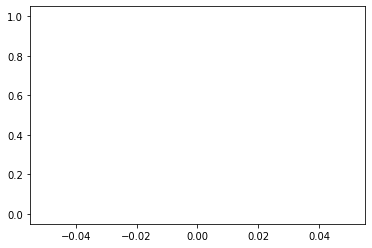

In [47]:
plt.close()
plt.plot(np.array([*tr_x_test[1942]]).reshape(1, -1))
plt.show()